$Kode \space : \space C++(Python)\space \space \space , \space \space \space  Dato \space : \space 19.11.2019 \space \space \space , \space\space\space Emne \space : \space Fys3150 \space \space \space , \space \space \space  Prosjekt \space : \space 4$

$ Navn \space : \space Roshan \space Azam \space , \space Erlend \space Akre $

# Studie av fase transisjon i magnetiske systemer

# 1. Abstrakt

I dette projektet har vi tatt for oss en elementær model for å beskrive termodynamikk, i et todimensjonalt binært system kalt isingmodelen. Gjennom Monte Carlo integrasjon og ved hjelp av metropolis algoritmen har vi simulert utviklingen av system med forskjelige størrelser for å kunne approksimere systemet når størrelsen går mot uendelig, i forskjellige temperaturer.

Dette har vært et interessant og spenndene projekt, men også et krevende projekt. Ettersom at beregningene i prosjektet er ganske tunge, og vi har hatt et behov for å parallellisere koden. Siden vi begge hovedsakelig bruker Windows valgte vi å implementere parallelliseringen gjennom Open MP, noe som ikke ble velykket, og vi endte opp med å simulere i serie i stenden. 

Resultatene våre tyder på at vi trenger omtrent $10^4$ eller mer Monte Carlo iterasjoner for å oppnå gode resultater, for modellene vi foretar oss i projectet. Ettersom modellene da oppnår et equilibrium stadie. I tillegg viser resultatene våre at høyere temperaturer aksepterer flere forskjellige konfigurasjoner, og dermed hopper lettere mellom forskjellige energier, enn kalde temperaturer som har en tendens til å holde én spesefikk energi, der alle spin peker i én rettning. Med andre ord har vi funnet ut at modellen følger en Boltzmanns distribusjon. 



# 2. Introduksjon
Målet med dette prosjektet er å bruke Ising modellen i to dimensjoner til å simulere fase transisjon. Ved en gitt kritisk temperatur vil modellen vår få en fase transisjon fra en magnetisk fase til en fase med null magnetisasjon. Systemet vårt er et binært system, der vi har et gitter på en viss størrelse, og inne i hvert av gitter "rommene" har vi objekter som spinner. Disse kan enten ha spinn opp eller spinn ned, slik at vi har et binært system. Vi vil få forskjellige konfigurasjoner av gitteret avhengi av hvor mange spinn som peker opp og ned, og hvordan de forskjellige spinnene er posisjonert. Vi ser først på Ising modellen i to dimensjoner, der har den analytiske svar som vi kan regne ut, dette blir forventningsverdiene våre. Disse kan vi bruke for å benchmarke kalkulasjonene våre for et 2x2 gitter. Etter at vi har satt opp forventningsverdiene våre kan vi begynne å sette opp koden for å simulere.

For simuleringene bruker vi Metropolis algoritmen, en algoritme som baserer seg på å akseptere og avvise konfigurasjoner og ser på forholdet mellom sannsynligheter. Vi bruker Monte Carlo metoden inne i Metropolis også. Vi vil kjøre koden på store gittere fordi vi vil se på hvordan systemet oppfører seg når vi nærmer oss uendelig. På grunn av dette kan simulasjonene ta veldig lang tid, så vi vil også parallellisere koden vår slik at vi kan kutte ned på tiden det tar å simulere.  Vi kan analysere dataene for å si noe om fase transisjonen, hvor den kritiske temperaturen ligger, hva slags sannsynlighetsfordeling vi har, og si noe om hvordan systemet oppfører seg når vi varmer det opp. Igjennom oppgaven vil temperatur være gitt ved $\frac{kT}{J}$. Alle temperaturene er skalert.

# 3.Formalisme
### 3.1 Oppsett av model
For å begynne å sette opp modellen vår trenger vi å finne ut av hva energien, magnetismen. Vi bruker Ising modellen, og i dens simpleste form kan vi skrive energi utrykket vårt som:
$$
  E=-J\sum_{< kl>}^{N}s_ks_l-{\cal B}\sum_k^Ns_k,
$$

Der $sk$ kan være $\pm$ 1. N er antall spin og $J$ er en konstant som bestemmer styrken i interaksjonen mellom de forskjellige spinnene. ${\cal B}$ er et eksternt magnetisk felt som har en interaksjon med det magnetiske momentet som settes opp av spinnene. $<kl>$ betyr at vi bare summerer over de nærmeste naboene. 
    
For å kunne regne ut forventningsverdiene for energien og magnetisasjonen i en gitt temperatur må vi ha en sannsynlighets distrubisjon. I dette tilfellet bruker vi Boltzmann distribusjonen. 

Vi bruker distribusjonen 
$$P_i(\beta) = \frac{e^{-\beta E_i}}{Z}$$
    $\beta = \frac{1}{kT}$, $k$ er Boltzmann konstanten, $E_i$ er energi i konfigurasjon $i$. Og Z er partisjonsfunksjonen er:
$$Z=\sum_{i=1}^{M}e^{-\beta E_i}$$ 

Der summen går over alle mikrostatene er $M$.

Energien i en spesifik konfigurasjon gis ved:
$$E_i =-J\sum_{< kl>}^{N}s_ks_l$$
I vårt tilfelle har vi et $2x2$ gitter med 4 spinn som kan peke opp eller ned, så da har vi $2^4=16$ forskjellige konfigurasjoner. 

### 3.2 Energi i konfigurasjonene
For å finne energien for hver av disse konfigurasjonene når vi ser på små systemer må vi ta hensyn til grensetilstandene. Vi kan velge mellom frie ender eller periodiske grensetilstander. Vi velger å bruke periodiske grensetilstander, men må huske på at svaret ikke blir det samme om vi bruker frie grensetilstander. Bruker vi periodiske grensetilstander betyr dette at vi antar at naboen til høyre for $s_N$ har verdien $s_1$. På samme måte antar vi at naboen til venstre for $s_1$ har verdien $s_N$. I vårt tilfelle får vi da at vi kan regne ut energien i hver konfigurasjon slik:

$$E_i = -J\Sigma^N_{j=1}S_j S_{j+1} $$
Dette gir oss ; 

$$E = -J \Sigma^N_{kl}s_k s_l $$

Som vi kan regne ut for hver av de 16 konfigurasjonene:

$$E(1, 1, 1, 1 ) = -j\Sigma^4_kl s_k s_l = -j(2 + 2 + 2 + 2) = - j 8$$ 
$$E(-1, 1, 1, 1 ) = -j\Sigma^4_kl s_k s_l = -j(2 + 0 + 0 -2) = 0 $$
$$E(1, -1, 1, 1 ) = -j\Sigma^4_kl s_k s_l = -j(0 + 2 - 2 + 0) = 0 $$
$$E(1, 1, -1, 1 ) = -j\Sigma^4_kl s_k s_l = -j(0 - 2 + 2 -2) = 0 $$
$$E(1, 1, 1, -1 ) = -j\Sigma^4_kl s_k s_l = -j(-2 + 0 + 0 2) = 0 $$
$$E(1, 1, -1, -1 ) = -j\Sigma^4_kl s_k s_l = -j(0 + 0 + 0 +0) = 0 $$
$$E(-1, -1, 1, 1 ) = -j\Sigma^4_kl s_k s_l = -j(0 + 0 + 0 +0) = 0 $$
$$E(1, -1, -1, 1 ) = -j\Sigma^4_kl s_k s_l = -j(0 + 0 + 0 +0) = 0 $$
$$E(-1, 1, 1, -1 ) = -j\Sigma^4_kl s_k s_l = -j(0 + 0 + 0 +0) = 0 $$
$$E(-1, -1, 1, 1 ) = -j\Sigma^4_kl s_k s_l = -j(0 + 0 + 0 +0) = 0 $$
$$E(-1, -1, 1, 1 ) = -j\Sigma^4_kl s_k s_l = -j(0 + 0 + 0 +0) = 0 $$
$$E(1, -1, 1, -1 ) = -j\Sigma^4_kl s_k s_l = -j( -2 -2  -2 -2 ) = j8 $$
$$E(-1, 1, -1, 1 ) = -j\Sigma^4_kl s_k s_l = -j( -2 -2  -2 -2 ) = j8 $$
$$E(1, -1, -1, -1 ) = -j\Sigma^4_kl s_k s_l = -j(-2 + 0 + 0 2) = 0 $$
$$E(-1, 1, -1, -1 ) = -j\Sigma^4_kl s_k s_l = -j(0 - 2 + 2 0) = 0 $$
$$E(-1, -1, 1, -1 ) = -j\Sigma^4_kl s_k s_l = -j(0 + 2 - 2 +0) = 0 $$
$$E(-1, -1, -1, 1 ) = -j\Sigma^4_kl s_k s_l = -j(2 + 0 + 0 -2) = 0 $$
$$E(-1, -1, -1, -1 ) = -j\Sigma^4_kl s_k s_l = -j(2 + 2 + 2 + 2) = - j 8$$

### 3.3 Magnetisasjon i konfigurasjonene
I tillegg til energien vil vi også regne ut magnetisasjonen. Denne finner vi ved:
 $${\cal M}_i=\sum_{j=1}^N s_j$$
Der vi summerer over alle spins for konfigurasjon $i$.

Regner vi ut dette får vi:
$$M(1, 1, 1, 1 ) = -j\Sigma^4_j s_j = (1 + 1 + 1 + 1) = 4$$ 
$$M(-1, 1, 1, 1 ) = -j\Sigma^4_j s_j = (-1 + 1 + 1 +1) = 2 $$
$$M(1, -1, 1, 1 ) = -j\Sigma^4_j s_j  = (1 - 1+1 +1) = 2 $$
$$M(1, 1, -1, 1 ) = -j\Sigma^4_j s_j = (1 + 1 -1 +1) = 2 $$
$$M(1, 1, 1, -1 ) = -j\Sigma^4_j s_j = (1 + 1 + 1 - 1) = 2 $$
$$M(1, 1, -1, -1 ) = -j\Sigma^4_j s_j = (1 + 1 + -1 -1) = 0 $$
$$M(-1, -1, 1, 1 ) = -j\Sigma^4_j s_j = (-1 -1 + 1 +1) = 0 $$
$$M(1, -1, -1, 1 ) = -j\Sigma^4_j s_j = (1 + 1 + -1 -1) = 0 $$
$$M(-1, 1, 1, -1 ) = -j\Sigma^4_j s_j = (-1 -1 + 1 +1) = 0 $$
$$M(1, -1, 1, -1 ) = -j\Sigma^4_j s_j  = ( 1 -1  +1 -1 ) = 0 $$
$$M(-1, 1, -1, 1 ) = -j\Sigma^4_j s_j  = ( -1 + 1 -1 +1 ) = 0 $$
$$M(1, -1, -1, -1 ) = -j\Sigma^4_j s_j = (1 - 1 -1 - 1) = -2 $$
$$M(-1, 1, -1, -1 ) = -j\Sigma^4_j s_j = (-1 + 1 -1 -1) = -2 $$
$$M(-1, -1, 1, -1 ) = -j\Sigma^4_j s_j  = (-1  -1 +1 -1) = -2 $$
$$M(-1, -1, -1, 1 ) = -j\Sigma^4_j s_j  = (-1 -1 -1 +1) = -2 $$
$$M(-1, -1, -1, -1 ) = -j\Sigma^4_j s_j = (1- -1 -1 -1) = -4$$ 


Vi kan sette dette opp i en tabell så det er klarere.

| Antall spinn rettning opp | multipler | Energi  | Magnetisasjon | 
| --- | --- | ---   | ---       | 
|  4 | 1   | -j8 | 4 | 
|  3   | 4   |  0 | 2 | 
|  2   | 4   |  0 | 0 |
|  2   | 2   |  j8 | 0 |
|  1   | 4   |  0 | -2 |
|  0   | 1   |  -j8 | -4 | 

Vi kan nå finne forventningsverdiene vi trenger for energi E, magnetisasjon M, spesifik varme Cv og susceptibilitet $\chi$. 

### 3.4 Partisjonsfunksjonen
For å kunne begynne å regne ut forventningsverdiene må vi først finne et utrykk for partisjonsfunksjonen Z. Vet at:
$$Z=\sum_{i=1}^{M}e^{-\beta E_i}$$ Vi vet allerede energien i alle konfigurasjoner $i$, så vi finner Z:

$$Z = 12 \cdot e^{- \beta \cdot 0} + 2\cdot e ^{- 8j \beta } + 2\cdot e ^{-(-8j) \beta} =12 + 4\cdot \frac{e ^{-8j \beta} + e^{-(-8j) \beta } }{2}$$
Vi får en konstant 12 fordi vi har 12 konfiguarsjoner der energien er 0. Vi har 4 konfigurasjoner, to der energien er 8j og to der energien er -8j. Vi ser at eksponensialene kan settes sammen ved hjelp av Eulers likning.

$$Z = 12 + 4\cdot \frac{e ^{8j \beta} + e^{-8j \beta}}{2} $$
$$Z = 4\cdot Cosh(8j \beta) + 12 $$
Nå som vi har partisjonsfunksjonen kan vi regne ut de andre forventningsverdiene ved hjelp av distribusjonen $P_i$.


### 3.5 Gjennomsnitsenergi
Starter med å regne sannsynlighetsverdien for gjennomsnittsenergien:
$$
\langle E \rangle = \sum_{i=1}^M E_i Pi(\beta)= \frac{1}{Z}\sum{i=1}^M E_ie^{-\beta E_i}$$

$$\langle E \rangle = \frac{1}{4Cosh(\beta j8) + 12}\sum_{i=1}^M E_ie^{-\beta E_i} $$

Vi har 12 $E_i$ som gir ikke gir noe bidrag, defor ser vi kun på $E_i \neq 0$; 

$$\langle E \rangle = -\frac{1}{4Cosh(\beta j8) + 12}\bigg( 2j8e^{j8\beta} -2j8e^{-j8\beta} \bigg) $$

$$\langle E \rangle = -\frac{1}{4Cosh(\beta j8) + 12}\bigg( 4j8(\frac{ e^{j8\beta} -e^{-j8\beta}}{2}) \bigg) $$

$$\langle E \rangle = -\frac{1}{4Cosh(\beta j8) + 12}\bigg( 4j8(Sinh( j8\beta) ) \bigg) $$

$$\langle E \rangle = -\frac{\bigg( 32j \cdot (Sinh( j8\beta) ) \bigg)}{4 \cdot Cosh(\beta j8) + 12} $$


### 3.6 Gjennomsnittsmagnetisasjon
Regner så ut forventningsverdien for gjennomsnittsmagnetisasjonen.

$$\langle {\cal M} \rangle = \sum_i^M {\cal M}_i P_i(\beta)= 
  \frac{1}{Z}\sum_i^M {\cal M}_ie^{-\beta E_i} $$
  
 Vi ser $M_i$ og $E_i$ ut fra tabellen vår. Vi kan da skrive:
 
 $$\langle {\cal M} \rangle = \frac{(4 \cdot 2e^0 + 4\cdot (-2)e^0 + (4e^{-8j\beta}) -4e^{-8j\beta})}{Z} = 0$$
 
 Dette resultatet er ikke tilfredstillende. Vi tar altså heller absoluttverdien av gjennomsnitsmagnetismen.
 Får da:
 
  $$\langle {|\cal M |} \rangle = \frac{4 \cdot 2e^0 + 4\cdot (|-2|)e^0 + 4e^{-8j\beta}+ |-4|e^{-8j\beta}}{Z} = \frac{16 + 8e^{-8j\beta}}{4Cosh(8j \cdot beta)+12}$$
  

### 3.7 Spesifik varme
Nå som vi vet forventningsverdi for gjennomsnittsenergi og gjennomsnittsmagnetisme kan vi finne utrykk for spesifik varme og suseptibilitet. Spesifik varme gis som:
  
  $$C_V= \frac{1}{k_BT^2}\left(\langle E^2 \rangle-\langle E \rangle^2\right)$$
  og suseptiblitet gis som:
 $$\chi=\frac{1}{k_BT}\left(\langle {\cal M}^2 \rangle-\langle {\cal M} \rangle^2\right)$$
 der $\left(\langle E^2 \rangle-\langle E \rangle^2\right)$ og $\left(\langle {\cal M}^2 \rangle-\langle {\cal M} \rangle^2\right)$ er den energi varians og magnetisk varians $\sigma_E$ og $\sigma_M$.
 
Vi starter med å regne ut $Cv$:
Varianse i energi gis som:
$$ \sigma_E^2=\langle E^2 \rangle-\langle E \rangle^2= \frac{1}{Z}\sum_{i=1}^M E_i^2e^{-\beta E_i}-\left(\frac{1}{Z}\sum_{i=1}^M E_ie^{-\beta E_i}\right)^2.$$

Vi regner først ut det første leddet:
$$<E^2>=\frac{1}{Z}\sum_{i=1}^M E_i^2e^{-\beta E_i} = \frac{1}{Z}((-8j)^2e^{\beta8j})+(-8j)^2e^{\beta8j})+((8j)^2e^{-\beta8j})+((-8j)^2e^{-\beta8j}))$$

$$<E^2>=8^2j^2\frac{1}{Z}((e^{\beta8j})+(e^{\beta8j})+(e^{\beta-8j})+(e^{\beta-8j})) $$

$$<E^2>=8^2j^2\frac{1}{Z}\bigg(2e^{\beta8j}+2e^{\beta-8j}\bigg)$$

$$<E^2>=8^2j^2\frac{1}{Z}\bigg(2e^{\beta8j}+2e^{\beta-8j}\bigg)\cdot \frac{2}{2}$$

$$\underline{\underline{<E^2>=4 \cdot 8^2j^2\frac{1}{Z}cosh(8j\beta)}}$$

Regner så ut for det andre leddet:
$$<E>^2=(\frac{1}{Z}\sum_{i=1}^M E_ie^{-\beta E_i})^2 = \bigg(\frac{1}{Z}(((-8j)e^{\beta8j})+(-8j)e^{\beta8j})+((8j)e^{-\beta8j})+((-8j)e^{-\beta8j}))\bigg)^2$$

$$ <E>^2= \frac{1}{Z^2}\bigg((-8j)e^{\beta8j})+(-8j)e^{\beta8j})+((8j)e^{-\beta8j})+((-8j)e^{-\beta8j}))\bigg)^2$$

$$ <E>^2 = 8^2j^2\frac{1}{Z^2}\bigg(2e^{\beta8j}+2e^{-\beta8j}\bigg)^2$$

$$ <E>^2 = 8^2j^2\frac{1}{Z^2}\bigg(4cosh(8j\beta)\bigg)^2$$

$$ <E>^2 = 8^2j^2\frac{1}{Z^2}(16cosh^2(8j\beta)$$

$$ <E>^2 = 16\cdot8^2j^2\frac{1}{Z^2}cosh^2(8j\beta)$$

$$\underline{\underline{ <E>^2 = 2^{10} \cdot j^2\frac{1}{Z^2}cosh^2(8j\beta)}}$$

Ut fra dette kan vi finne Cv:

$$Cv = \frac{1}{k_bT^2}<E^2>-<E>^2$$

$$\underline{ \underline{Cv = \frac{1}{k_bT^2}((4 \cdot 8^2j^2\frac{1}{Z}cosh(8j\beta)-(2^{10} \cdot j^2\frac{1}{Z^2}cosh^2(8j\beta))}}$$

Der Z = $4Cosh(\beta j8) + 12$

### 3.8 Susceptibilitet

Vi kan så regne ut den suseptibiliteten $\chi$:
Variansen i magnetisme er gitt som:
$$ \sigma_ \mathcal{M} ^2=\langle  \mathcal{M} ^2 \rangle-\langle  \mathcal{M}  \rangle^2= \frac{1}{Z}\sum_{i=1}^M  \mathcal{M} _i^2e^{-\beta E_i}-\left(\frac{1}{Z}\sum_{i=1}^M  \mathcal{M} _ie^{-\beta E_i}\right)^2.$$

$$ \sigma_ \mathcal{M} ^2 = \frac{1}{Z}\sum_{i=1}^M  \mathcal{M} _i^2e^{-\beta E_i}-\left(\frac{1}{Z}\sum_{i=1}^M  \mathcal{M} _ie^{-\beta E_i}\right)^2.$$

Starter igjen med å regne første ledd:
$$<\mathcal{M}^2> = \frac{1}{Z}\sum_{i=1}^M  \mathcal{M} _i^2e^{-\beta E_i} $$

$$<\mathcal{M}^2> = \frac{1}{Z}\bigg(4\cdot2^2e^0+4\cdot(-2)^2e^0+4^2e^{-8j\beta}+(-4)^2e^{-8j\beta}\bigg) $$

$$<\mathcal{M}^2> = \frac{1}{Z}\bigg(32 + 4^2e^{-8j\beta}+(-4)^2e^{-8j\beta}\bigg) $$

$$<\mathcal{M}^2>= 16\frac{1}{Z}\bigg(2 + 2e^{-8j\beta}\bigg) $$

$$\underline{\underline{<\mathcal{M}^2>= 32\cdot \frac{1}{Z}\bigg(1 + e^{-8j\beta}\bigg)}} $$

Der Z = $4Cosh(\beta j8) + 12$

Regner så det andre leddet:
$$ <\mathcal{M}>^2 = \left(\frac{1}{Z}\sum_{i=1}^M  \mathcal{M} _ie^{-\beta E_i}\right)^2 $$

$$<\mathcal{M}>^2 = \frac{1}{Z^2}\bigg(4\cdot2e^0+4\cdot(-2)e^0+4e^{-8j\beta}+(-4)e^{-8j\beta}\bigg)^2 $$

$$<\mathcal{M}>^2 = \frac{1}{Z^2}\bigg(4e^{-8j\beta}+(-4)e^{-8j\beta}\bigg)^2 $$

$$<\mathcal{M}>^2 = 0 $$

Dette gir ikke noe tilfredstillende svar så vi prøver med $<|\mathcal{M}|>^2$:
$$ <|\mathcal{M}|>^2 = \left(\frac{1}{Z}\sum_{i=1}^M  |\mathcal{M}|_ie^{-\beta E_i}\right)^2 $$

$$<\mathcal{|M|}>^2 = \frac{1}{Z^2}\bigg(4\cdot2e^0+4\cdot(|-2|)e^0+4e^{-8j\beta}+(|-4|)e^{-8j\beta}\bigg)^2$$

$$\underline{\underline{<\mathcal{|M|}>^2 = \frac{1}{Z^2}\bigg(16+8e^{-8j\beta}\bigg)^2}}$$


Kan da sette opp et utrykk for suscepitibiliteten:
$$\chi = \frac{1}{k_b T}\bigg( \bigg< M  ^2 \bigg> - \bigg< |M| \bigg>^2 \bigg)$$
Mer at vi bruker $<|M|>$ her. Dette er ikke nødvendig, vi kan også bruke den uten absoluttverdi. 
Setter inn variansen:
$$\underline{\underline{\chi = \frac{1}{k_b T}\bigg( 32\cdot \frac{1}{Z}\bigg(1 + e^{-8j\beta}\bigg) - \frac{1}{Z^2}(16+8e^{-8j\beta})^2 \bigg)}}$$
Det ser ikke ut til at vi lett kan forenkle dette utrykket så vi lar det stå slik.

### 3.9 Metropolis
Vi har da alle de analytiske forventningsverdiene vi trenger. Vi må nå sette opp et program for å løse dette problemet numerisk. For dette bruker vi Metropolis Algoritmen. Her trenger vi ikke partisjonsfunksjonen, siden Metropolis algoritmen bare ser på forholdet mellom sannsynligheter. Dette er bra siden partisjonsfunksjonen og PDFen kan være tung å beregne for større gittere. Vi har at nummer av konfiguarsjoner er gitt ved $2^N$, der $N = LxL$. L er lengden på gitteret. 

Slik setter vi opp Metropolis algoritmen:
Vi definerer en initial tilstand med energien $E_b$ ved å posisjonere oss i en vilkårlig konfigurasjon. Vi forandrer initial konfigurasjonen ved å flippe ett av spinnene, og finner energien ved denne test tilstanden $E_t$. Finner så differansen i energi $\Delta E=E_t-E_b $, der $\Delta E$ kan være en av fem verdier. For å se dette velger vi en vilkårlig spin position x,y og antar at denne og de nærmeste naboene peker oppover. Energien fra konfiguarsjonen er da $E = -4J$. Flipper vi nå vår vilkårlig valgte spin blir $E=4J$, dette gir $\Delta E = 8J$. Vi kan gjøre det samme for de fire andre mulighetene. Vi får da fem mulige verdier: $\Delta E = 8J, \Delta E = 4J, \Delta E = 0, \Delta E = -4J$ og $\Delta E =-8J$. 

Hvis $\Delta E \le 0$ aksepterer vi den nye konfigurasjonen, som betyr at energien blir lavere, og vi håper på at vi beveger oss mot et energi minimum for en gitt temperatur. Men hvis $\Delta E >  0$ kalkulerer vi $w=e^{-(\beta \Delta E)}$, og sammenlikner $w$ med et vilkårlig tall $r$. Hvis $r \le w$ aksepterer vi den nye konfigurasjonen, hvis ikke beholder vi den gamle konfigurasjonen. Etter at vi har akseptert/avvist en konfigurasjon oppdaterer vi forventningsverdien vår. Vi gjentar så denne prosessen helt til vi får tilfredsstillende resultater. Hver gang vi går gjennom gitteret, for eksempel når vi har summert alle spinnene, telles dette som en Monte Carlo syklus. Vi kan tenke på en slik syklus som en måling. På slutten brude vi dividere de forskjellige forventnigsverdiene med total antall MC sykluser. Vi velger også å dele på antall spinn, da er resultatene våre for f.eks energi gitt som energy per spinn.


### 3.10 Fase transisjon
En fase transisjon er en makroskopisk forandring når vi får en forandring i ett av våre eksterne parametere. F.eks høyere temperatur. Punktet der vi har fase transisjon kalles det kritiske punktet. Vi har to forskjellige typer av fase transisjon: første orden og andre orden. En viktig ting vi ser på når vi studerer fase transisjon er correlasjonslengde $\xi$ og andre korrelasjoner som spin-spin korrelasjon. Korrelasjonslengde avhenger av ting som trykk og temperatur. 

Ising modellen i to dimensjoner med $\beta = 0$ gjennomgår fase transisjon av andre grad. Dette betyr egentlig at under en gitt kritisk temperatur Tc har Ising modellen spontan magnetisasjon med $M$ ikke lik 0. Over Tc er magnetisasjonen 0. 

Det er mulig å vise at gjennomsnittsmagnetisasjonen for en temperatur Tc er gitt ved:
$$\langle {\cal M}(T) \rangle \sim \left(T-T_C\right)^{\beta}, \hspace{3cm} \beta=\frac{1}{8}$$
Vi får en liknende sammenheng for varme kapasiteten og susceptibilieten:
$$C_V(T) \sim \left|T_C-T\right|^{-\alpha}$$ og $$\chi(T) \sim \left|T_C-T\right|^{-\gamma}$$
Der $\alpha=0$ og $\gamma = -\frac{7}{4}$.

Korrelasjonslengden gis ved dette utrykket:
$$  \xi(T) \sim \left|T_C-T\right|^{-\nu}.
\label{eq:xi}$$
Spinnene blir mer og mer korrelerte når vi T nærmer seg Tc, så korrelasjonslengden øker når vi kommer nærmere den kritiske temperaturen. 

Annen ordens fase transisjon er karakterisert ved at korrelasjonslengden går over hele systemet. Siden vi alltid må ha et endelig gitter vil $\xi$ alltid være proportional med størrelsen på gitteret. Gjennom endelig størrelses skalering kan vi relatere oppførselen til et endelig gitter med resultatene fra et uendelig gitter.
Vi skalerer den kritiske temperaturen til:
 
 $$T_C(L)-T_C(L=\infty) \propto aL^{-1/\nu}
\label{eq:tc}$$
Der a er en konstant og $\nu$ er definert ut fra utrykket for korrelasjonslengde.
Den nye korrelasjonslengden for et enedelig gitter blir gitt ved:

$$ \xi(T) \propto L\sim \left|T_C-T\right|^{-\nu}$$

Setter vi $T = T_c$ kan vi få følgende utrykk for magnetisasjon, susceptibilitet og energi når $T \le T_C$:

Magnetisasjon ;
$$  \langle {\cal M}(T) \rangle \sim \left(T-T_C\right)^{\beta}
  \propto L^{-\beta/\nu}$$
Varmekapasitet ;
$$C_V(T) \sim \left|T_C-T\right|^{-\gamma} \propto L^{\alpha/\nu}$$

Susceptiblitet.
$$\chi(T) \sim \left|T_C-T\right|^{-\alpha} \propto L^{\gamma/\nu}$$ 

 
 Med denne informasjonen kan vi plotte de forskjellige størrelsene våre og analysere hva som skjer med fasetransisjonen.

### 3.11 Om koden
I koden vår starter vi med å sette opp Metropolis algoritmen slik at vi kan finne de numeriske forventningsverdiene som vi fant analytisk. Når vi har satt opp disse kan vi sammenlikne og se om de analytiske og numeriske verdiene har noen sammenheng. Dette vil være typen unt-tests som vi gjør for denne oppgaven, der vi sammenlikner verdiene. 

Vi har laget forskjellige varianter av Metropolis avhengi om vi vil ha kald start eller random start. Dette er fordi vi vil se en forskjell avhengi av hva slags konfigurasjon vi starter i. For å gjøre dette har vi en initialiserings funksjon som alltid setter alle spinnene lik 1, og vi har en annen der vi velger ett vilkårlig tall mellom 0 og 1, så lenge det vilkårlige tallet er mindre enn 0.5 setter vi spinn lik 1, hvis det er større setter vi spinn lik -1.

Når vi studerer fase transisjon ser vi på L=40,60,80 og 100, og plotter $\langle {E} \rangle $, $\langle {|\cal M|} \rangle$, $C_v$ og $\chi$. Når vi gjør dette skal vi kunne se et faseskift i de forskjellige verdiene, dette skjer fordi utrykkene våre for fase transisjon er for når L går mot uendelig, men dette må vi approksimere ved skalering siden datamaskinen ikke klarer å håndtere noe uendelig. 

Når vi har så store gittere må vi også parallellisere koden vår, siden det kan ta veldig lang tid å kjøre simuleringene våre for store gittere når vi vil ha en god nøyaktighet. Dette betyr at vi må over $10^4$ integrajsonspunkter.

# 4.Resultater

## 4.1 Sammenlikning

|$\space$ |$\langle E \rangle$| $\langle M \rangle$ | $C_v$ | $\chi$|
| --- | --- | --- |--- |--- |
|  Analytisk |  -1.99598 |0.00066969 |0.0320752|0.00133781 |
|  Numerisk|  -1.99591| 0.99862  |  0.0326531|0.00418238|

$Tabell.1$: Tabell for L = 2 som sammenlikner analytiske og numeriske verdier av forskjellige parametere. Temperatur er lik 1. Dette er for $10^6$ Monte-Carlo simulasjoner. Vi har testet for mindre enn dette, hvis du vil ha gode resultater burde du minst ha mer enn $10^4$ MC simulasjoner. 


### 4.2 Mest sannsynlige tilstand
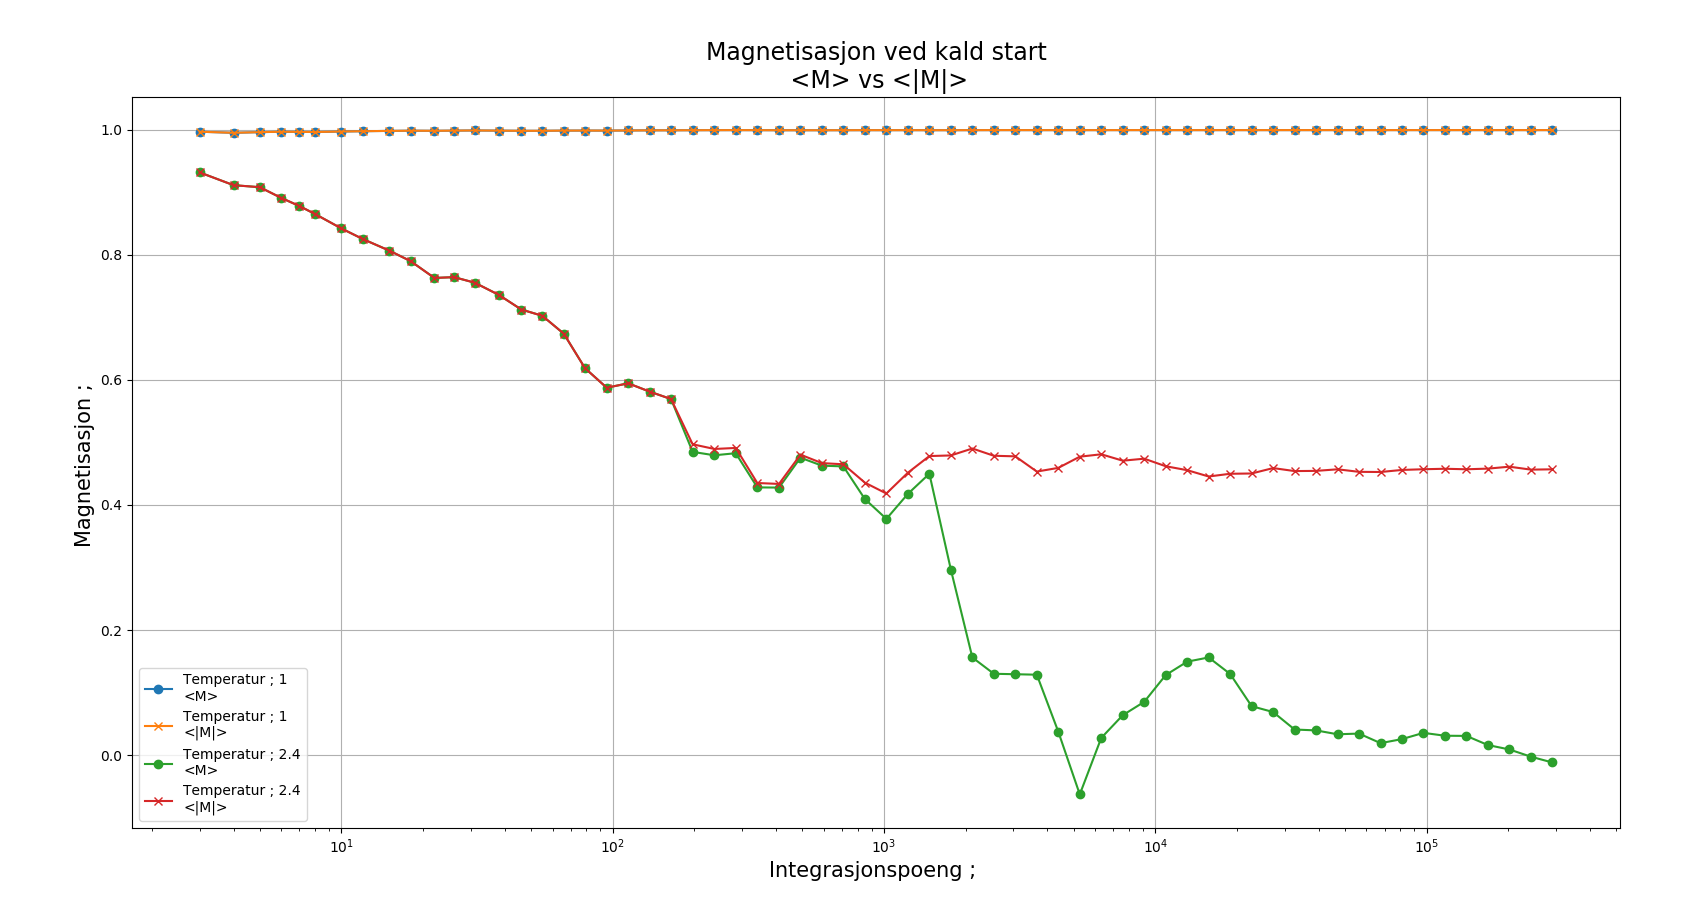
$Plott.1:$ Plott av magnetisasjonen der spinnene har vilkårlig retning ved start. Har plottet for både magnetisasjonen og den absolutte magnetisasjonen. Siden den absolutte magnetisasjonen er den viktigste har vi satt ekstra markeringer på den. Har plottet for T = 1 og T = 2.4. Integrasjonspoeng på x-aksen og magnetisasjonen på y-aksen. 



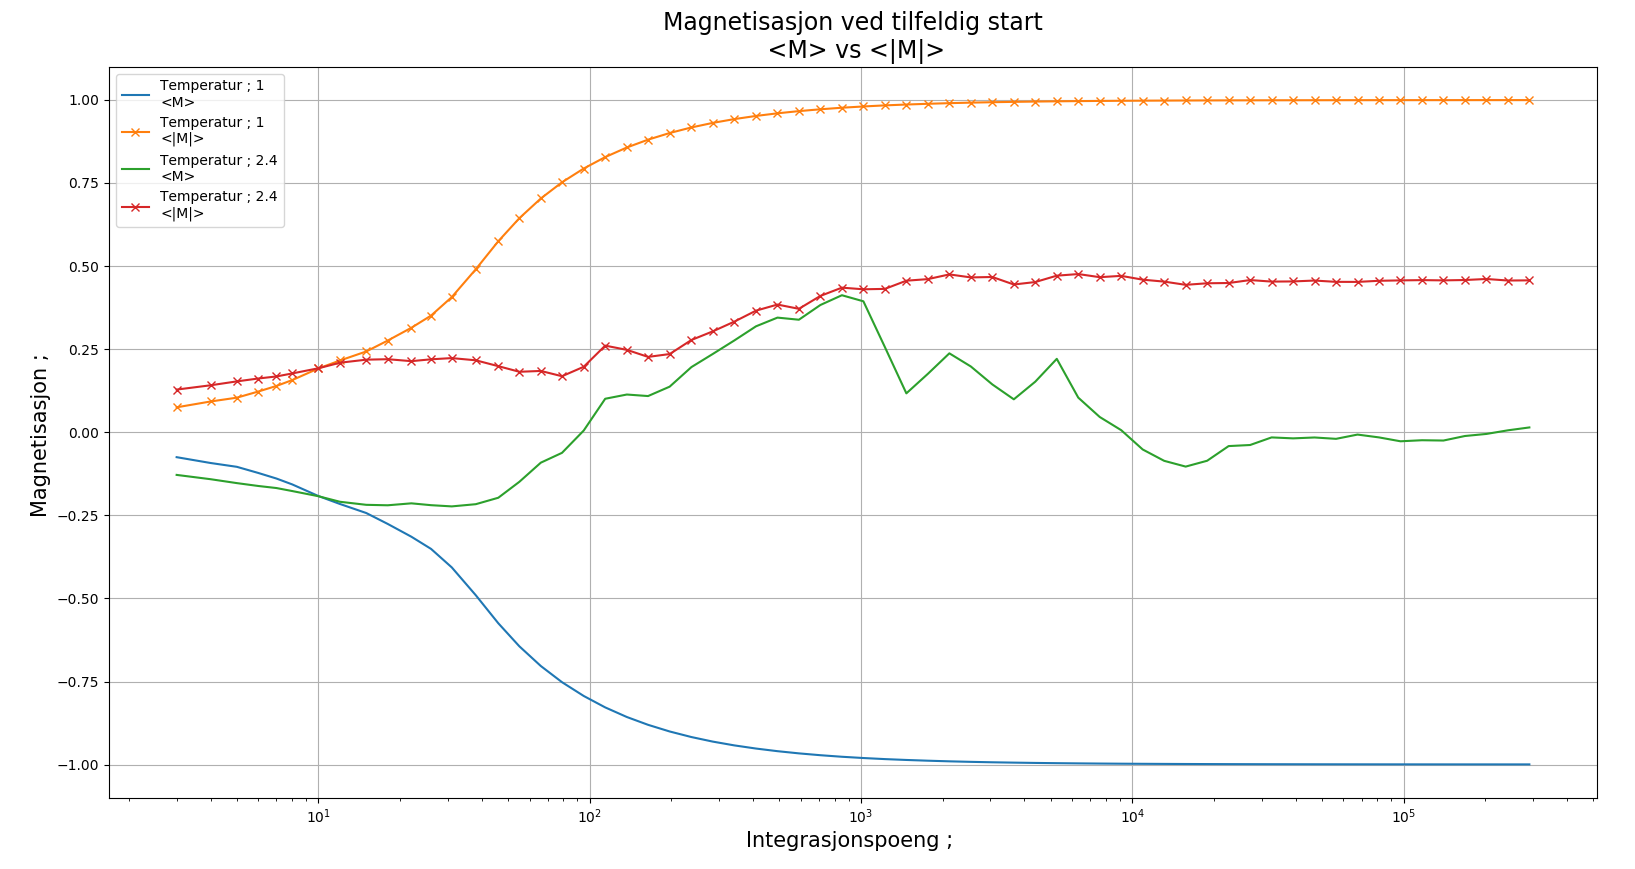
$Plott.2:$ Plott av magnetisasjonen der alle spinnene peker opp ved start. Har plottet for både magnetisasjonen og den absolutte magnetisasjonen. Siden den absolutte magnetisasjonen er den viktigste har vi satt ekstra markeringer på den. Har plottet for T = 1 og T = 2.4. Integrasjonspoeng på x-aksen og magnetisasjonen på y-aksen. 


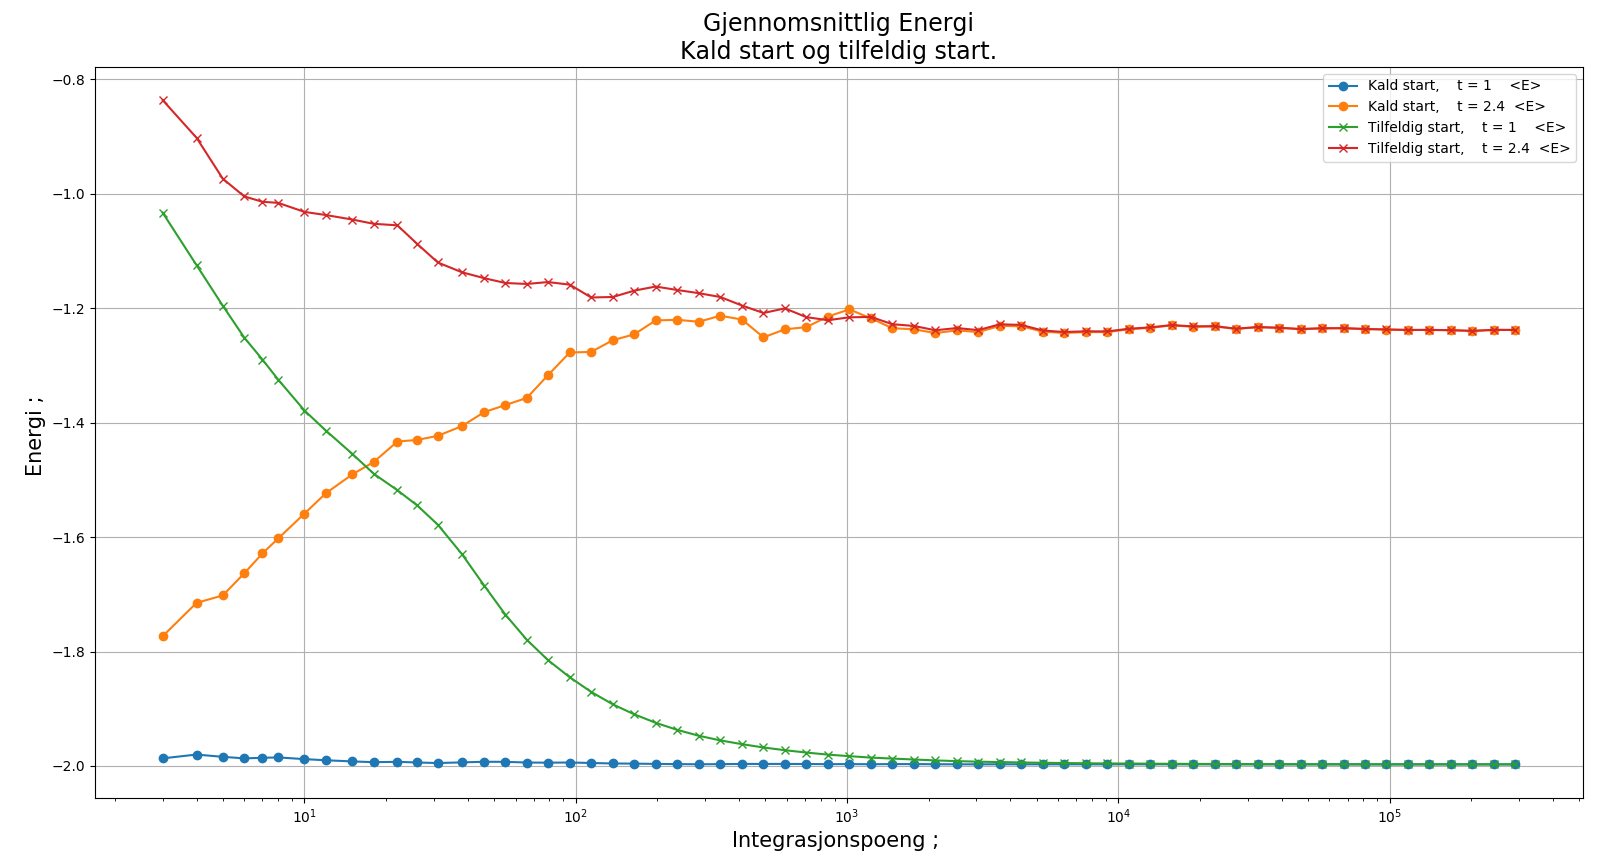
$Plott.3:$ Plott av gjennomsnittsenergien for vilkårlig og kald start, for temperaturene 1 og 2.4. Integrasjonspoeng på x-aksen, energier på y-aksen. 

!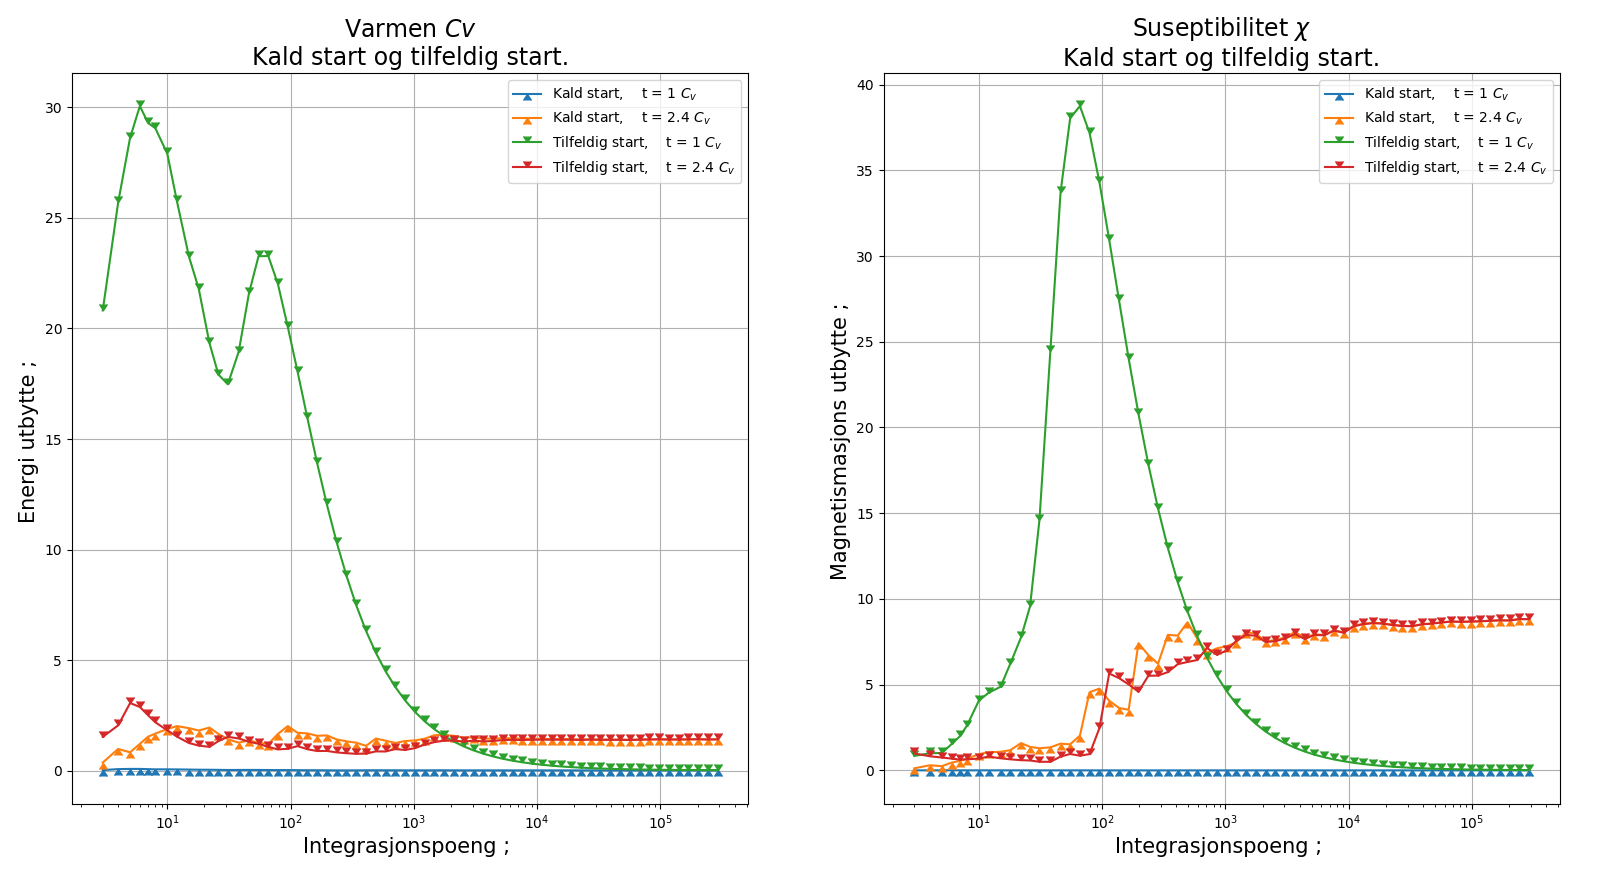
$Plott.4:$ Plott av spesifik varme $Cv$ og susceptibiliteten $\chi$. Integrasjonspunkter på x-aksen og varme/susceptibilitet på y-aksen.

Ut fra disse plottene ser vi at den mest sannsynlige tilstanden blir nådd ved omtrent $10^4$ Monte Carlo sykler, siden det er her verdiene våre blir stabile. Dette er altså equilibrium situasjonen for disse verdiene.

### 4.3 Godkjente konfigurasjoner
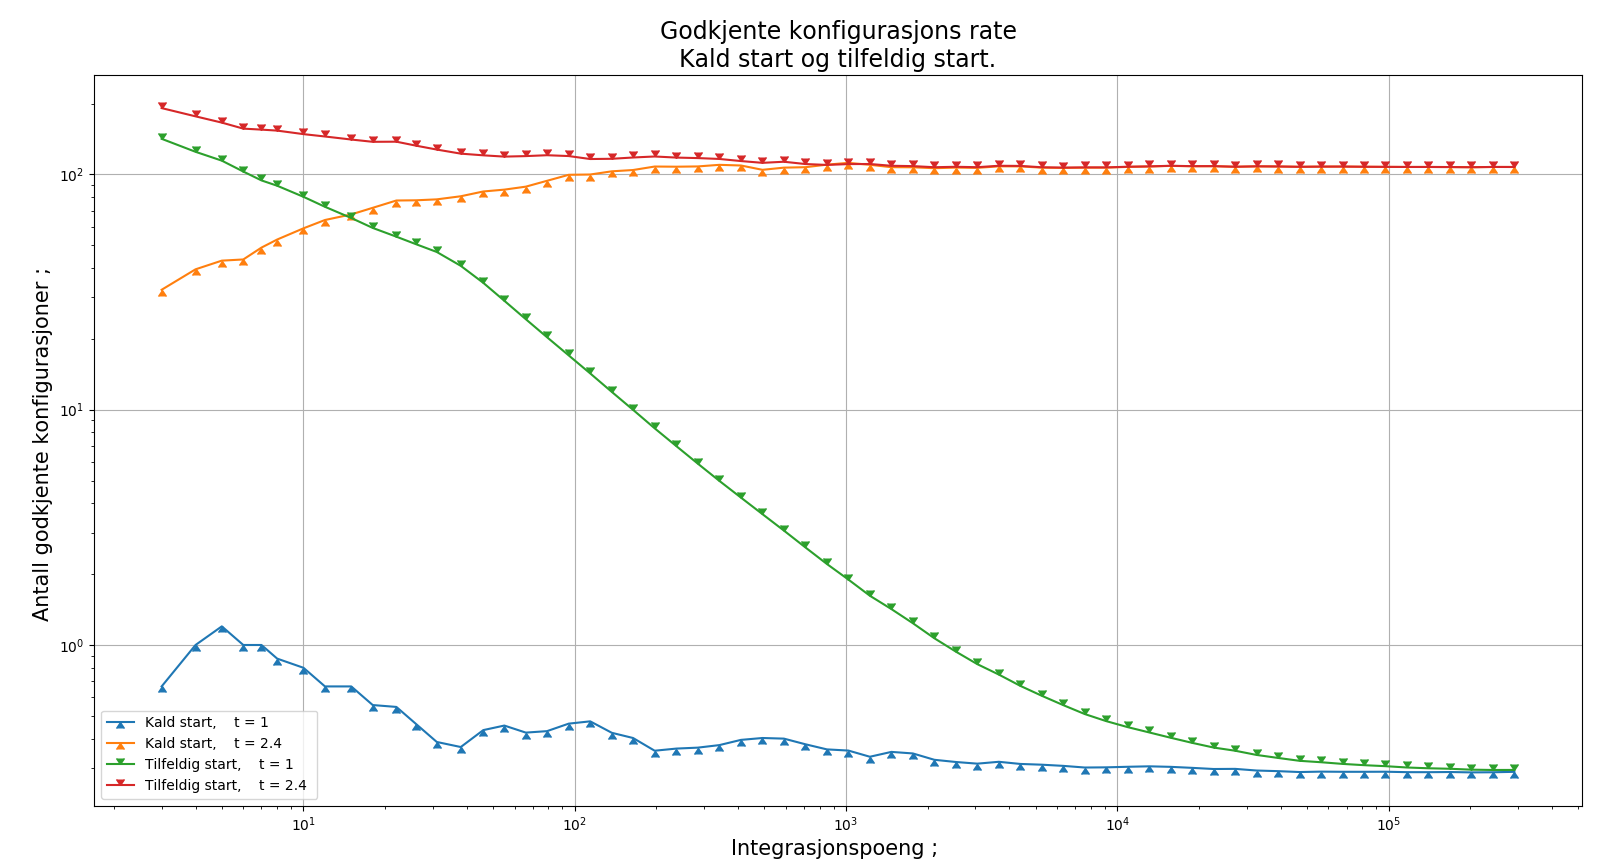
$Plott.5:$ Plott av antall godkjente konfigurasjoner av Metropolis algoritmen per integrasjonspunkt for temperatur 1 og 2.4. Har plottet for kald og tilfeldig start. Antall godkjente konfigurasjoner på y-aksen og antall integrasjonspunkter på x-aksen.

### 4.4 Sanssynlighetsfordeling
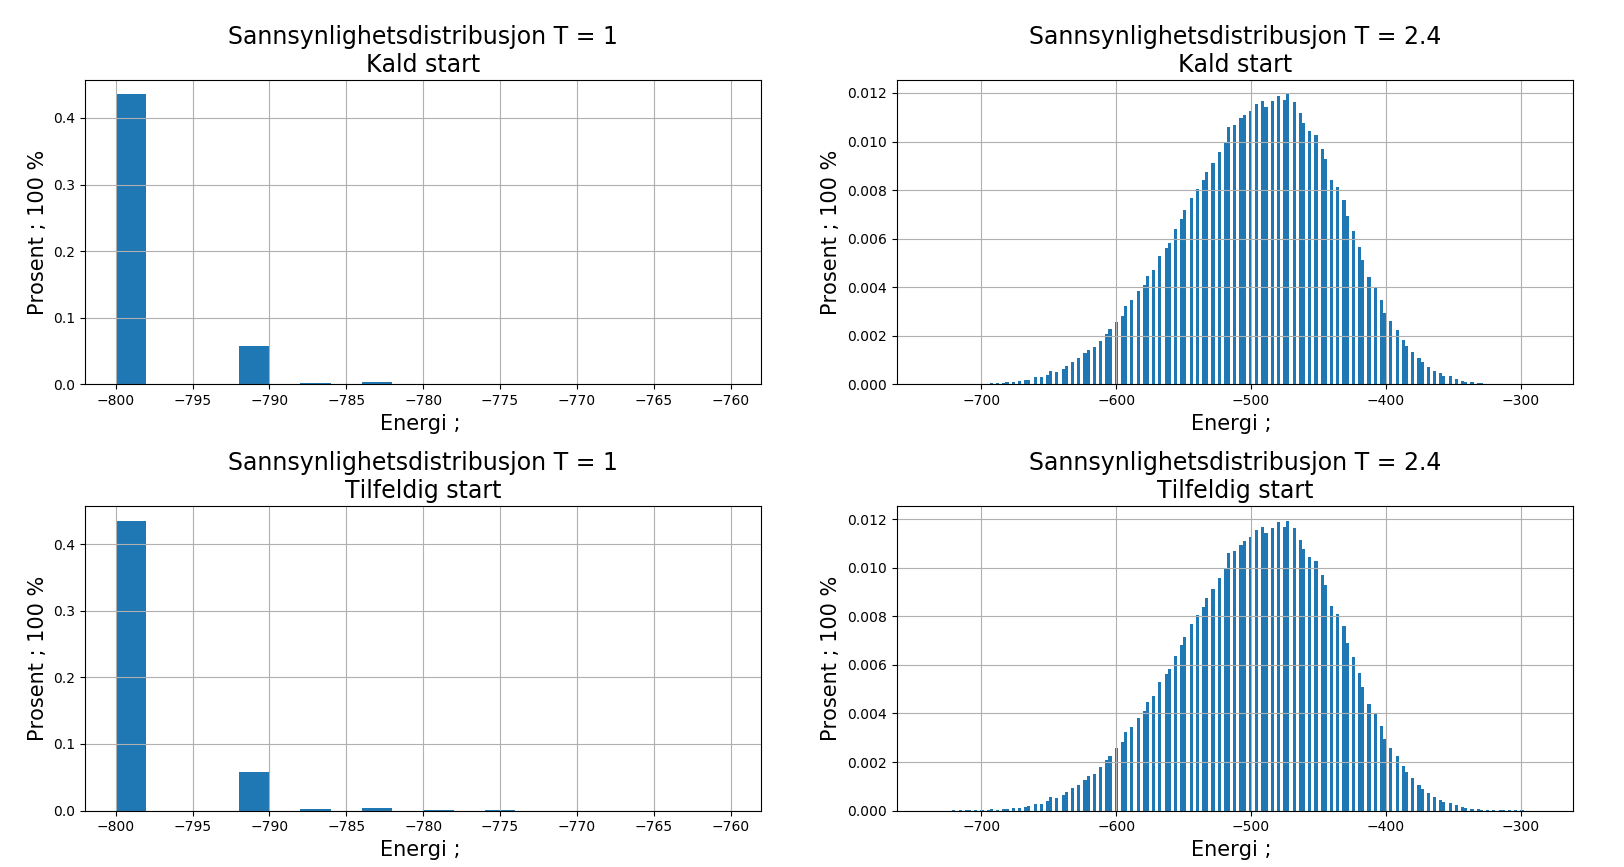
$Plott.6:$ Histogram av sannsynlighetsdistribusjonen for et gittet der L = 20, ved T=1 og T=2.4. Vi har plottet for start når alle spinnene er i samme retning og når alle spinnene peker i vilkårlige retninger. Energiene er på x-aksen, y-aksen er sannsynligheten for at vi har en viss energi. Vi har passet på at vi er i equilibrium stadiet når vi gjennomfører analysen vår.

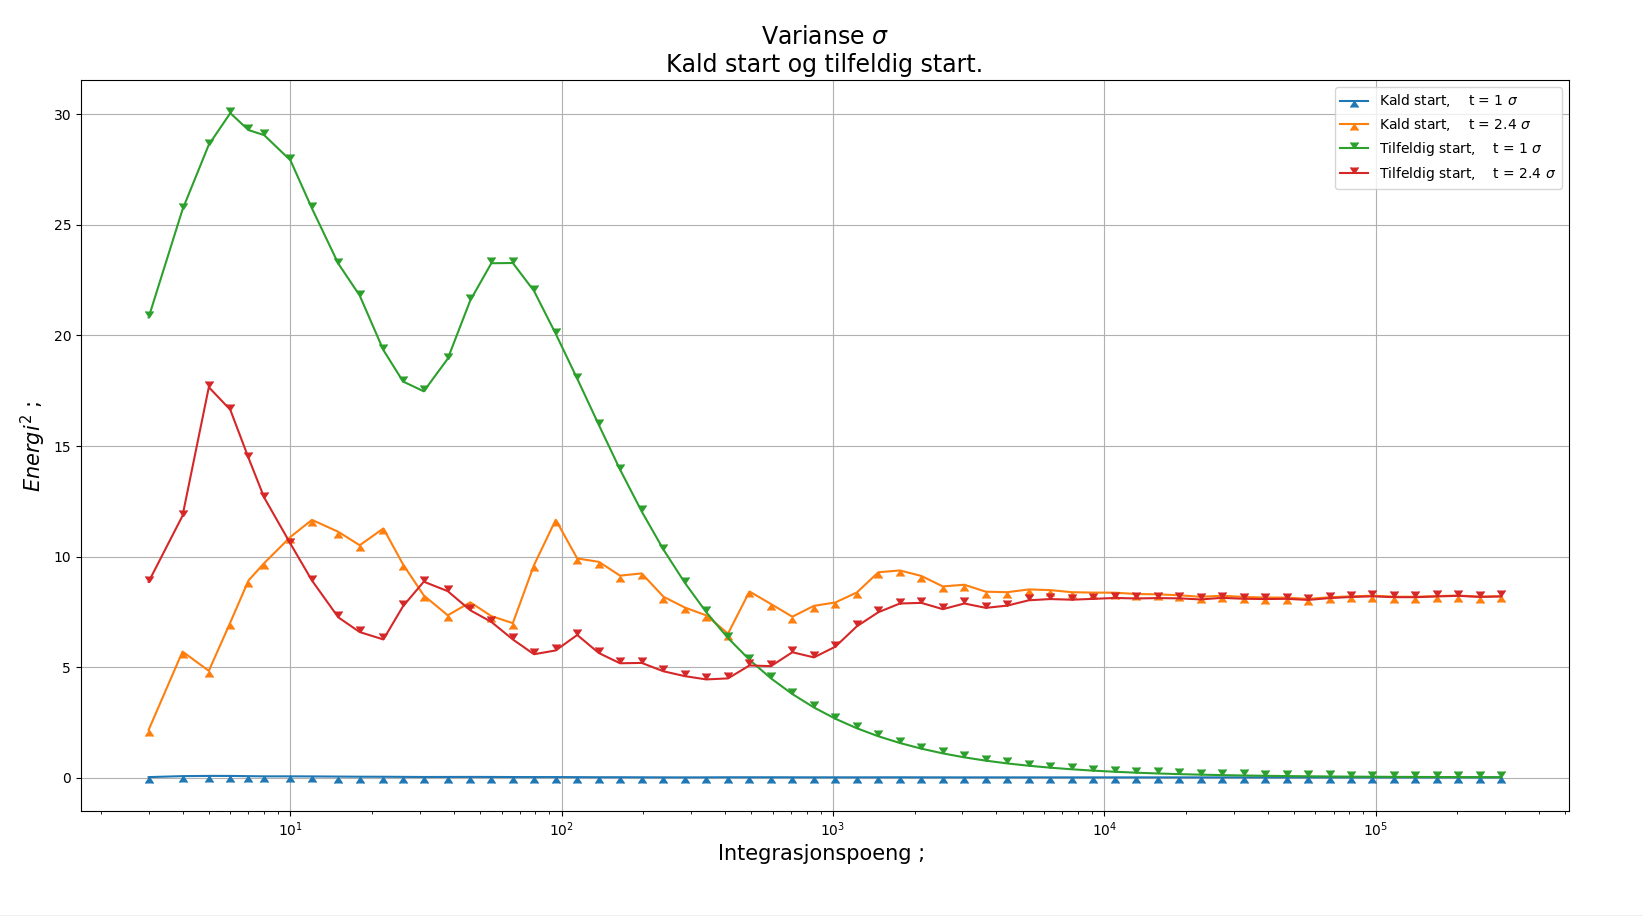
$Plott.7:$ Plott av den komputerte variansen $\sigma_E^2$ slik at vi kan sammenlikne den med sannsynlighetsfordelingen. Plottet for kald og tilfeldig start, for temperatur 2.4 og 1.

### 4.5 Fase skifte
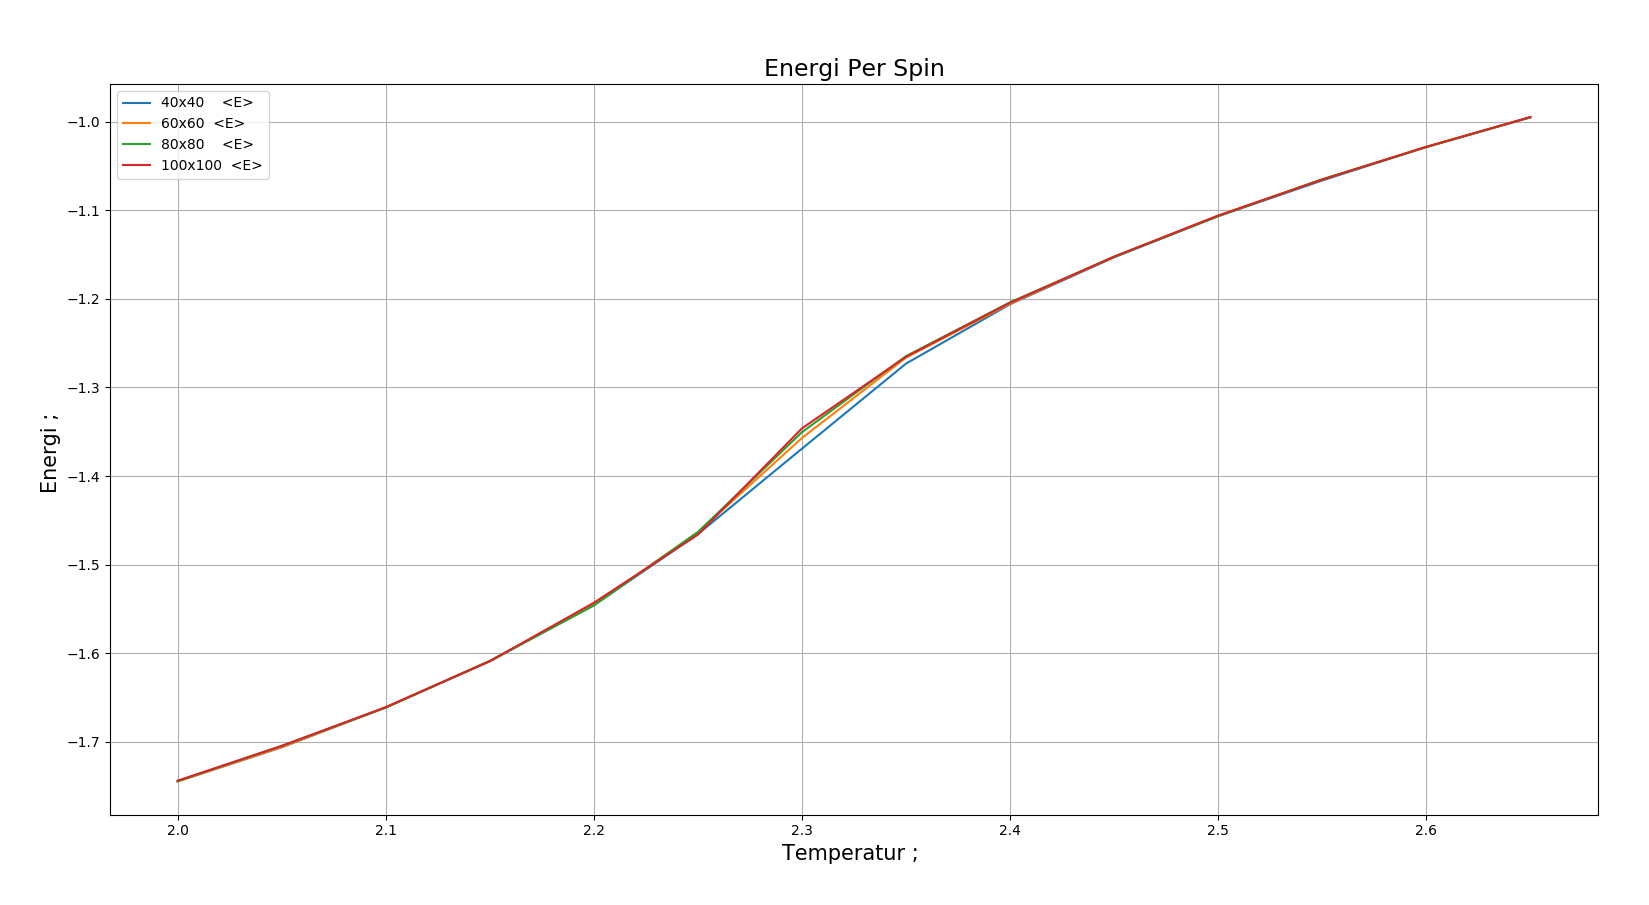
$Plot.8$: Plott av energien. $10^5$ MC sykler, T går fra 2 til 2.65 med 0.05 steglengde. Integrasjonspunkter på x-aksen, gjennomsnittsenergi på y-aksen. For forskjellige L.


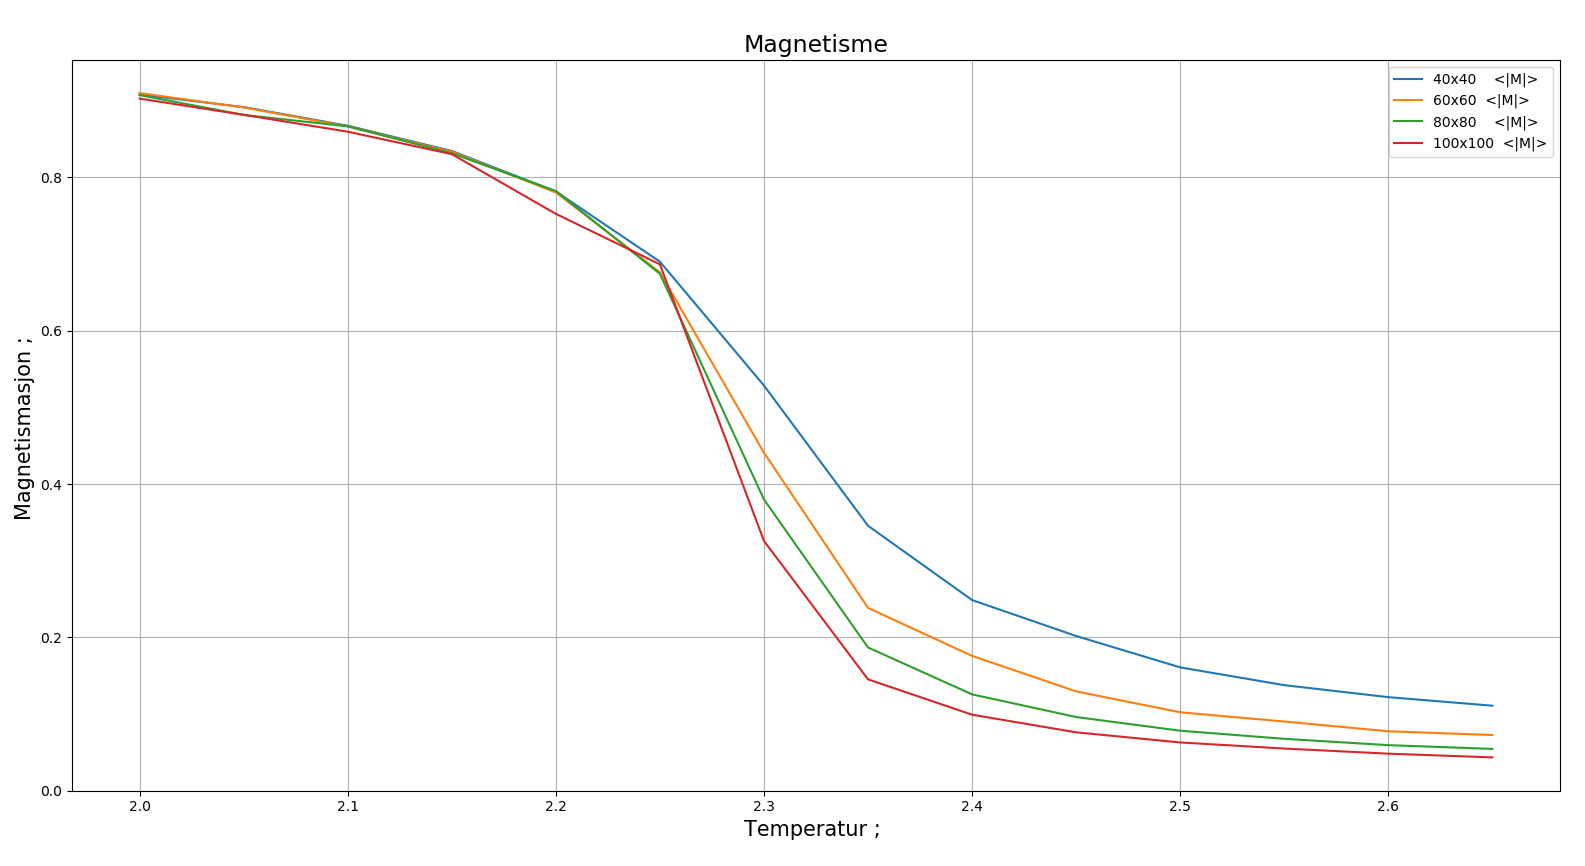
$Plot.9$: Plott av magnetisasjonen. $10^5$ MC sykler, T går fra 2 til 2.65 med 0.05 steglengde. Integrasjonspunkter på x-aksen, gjennomsnittsmagnetisasjon på y-aksen. For forskjellige L.

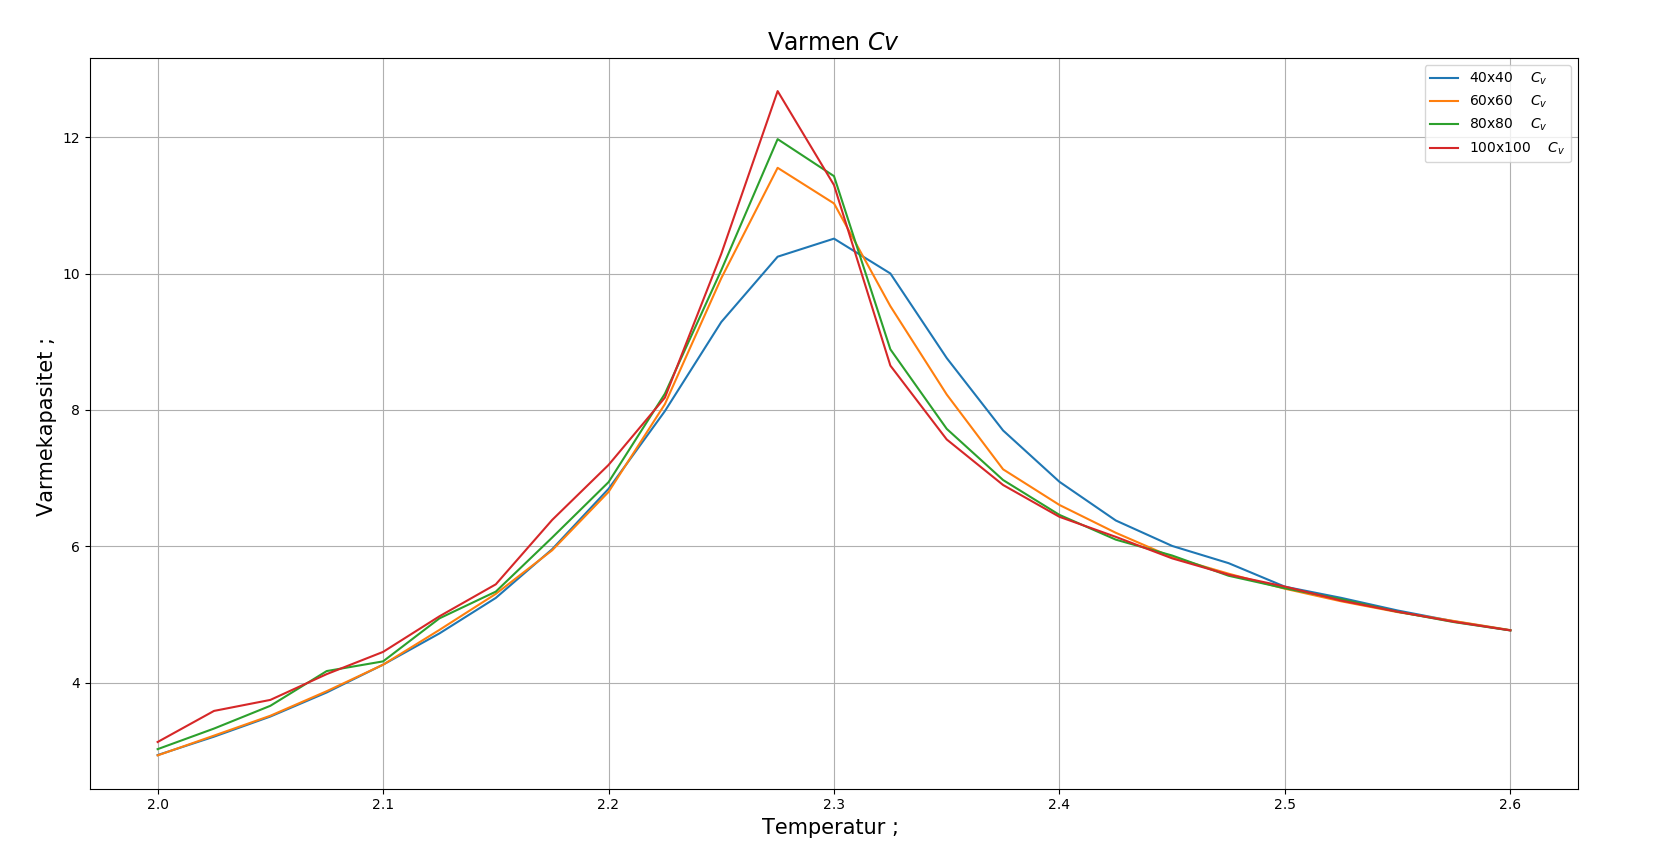
$Plot.10$: Plott av faseskifte i $Cv$. $10^6$ MC sykler, T går fra 2 til 2.6 med 0.01 steglengde. Integrasjonspunkt på x akse, $Cv$ på y.

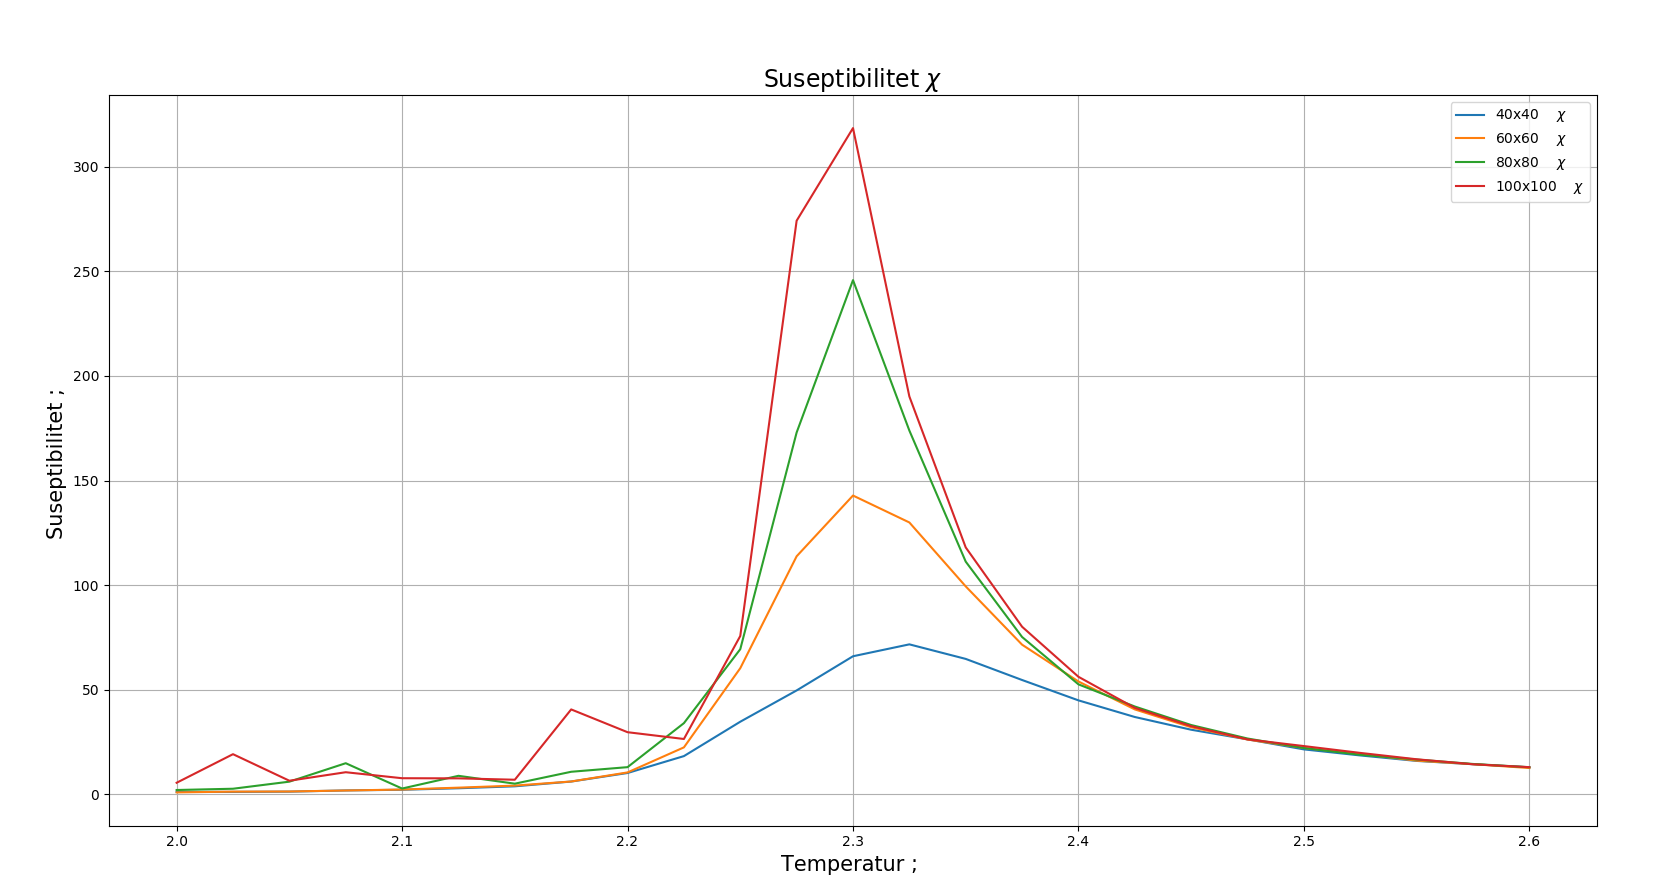
$Plot.11$: Plott av faseskifte i $\chi$. $10^6$ MC sykler, T går fra 2 til 2.6 med 0.01 steglengde. Integrasjonspunkt på x akse, $\chi$ på y.

### 4.6 Tid
| Konfigurasjon | Monte Carlo integrasjonspunkter | Temperatur rekkevidde | $\Delta$ Temperatur |
|      ---               | ---     |  ---   | --- |
| $Benchmark$ |  10 000 | 2.0 - 2.6 | $\Delta$T = 0.05 |
| $Simulation$ | 1 000 000 | 2.0 - 2.6 | $\Delta$T = 0.025 |


Dette gir oss en anslått tidsfaktor på $MCS \cdot \Delta t = 100 \cdot 2 = 200$

|  $\space$                      | $Stock$ | $Optimalisert$ | $Parallellisert$ | $Parallellisert \space og \space optimalisert$ |
|      ---               | ---     |  ---   | ---  | --- |
| $Benchmarked$ AMD(R5 2600x) |   136.33 s |  67.634 s  | 257.881 s | 143.1 s |
| $Teoretisk$ AMD(R5 2600x) |  7t  34m  26s     |  3t  45m  27s    | 14t  19m  36s | 07t  57m  00s |
| $Simulasjon$ AMD(R5 2600x) |   -     |   3t  32m  49s      | - |-|
| $Benchmarked$ INTEL(I7 6700K)  |   118.449 s |  62.056 s     | 128.559 s | 83.09 s |
| $Teoretisk$ INTEL(I7 6700K) |  6t  34m  50s   | 3t  26m  51s    | 7t  08m  31s | 4t  36m  58s |
| $Simulasjon$ INTEL(I7 6700K) |   -     |   03t  18m  30s     | - | - |

$Tabell 2$: Tabell for de forskjellige tidene for forskjellige CPU-er. Teoretisk, benchmarked og simulert. 


### 4.7 Kritisk temperatur
| $\space$ | Kritisk temperature |
|      ---               | ---     | 
| L=40 |  2.3 | 
| L=60 | 2.29 | 
| L=80 | 2.28 | 
| L=100 | 2.27 |

$Tabell.3$: Tabell for kritiske temperaturer for forskjellig størrelse av L.

# 5.Diskusjon

### 5.1 Mest sannsynlig tilstand
Sammenlikner vi de numeriske verdiene med de numersike ser vi at du er ganske like så lenge vi har minst $10^4$ MC sykler. Vi ser at verdiene stemmer for energien og $Cv$, men vi får den ikke til å stemme ordentlig for magnetisasjonen og susceptibiliteten. Dette er mest sannsynlig fordi vi har regnet feil i det analytiske utrykket eller satt opp det opp feil i koden. Dette fører også til at $\chi$ ikke blir riktig heller. Dette ødelegger litt for unit-testen vår, men vi bruker fortsatt $Cv$ og energien for å teste.  

Vi ser at den mest sannsynlige tilstanden blir nådd ved omtrent $10^4$ ut fra de forskjellige plottene, om vi ser på verider som den absolutte magnetismen, energien, Cv og $\chi$. Dette passer godt med verdiene vi fant i tabell 1, siden det er her verdiene våre begynner å bli stabile slik at vi får bedre approksimasjoner. I plott 1 har vi kald start som betyr at alle spinnene peker i samme retning og her er det den absolutte magnetisasjonen som vi vil fokusere på. Vi ser at for T=1 er den konstant, som betyr at den alltid er stabil. På T = 2.4 er den veldig ustabil før $10^4$, før den når et slags equilibrium stadie. Dette tyder på at når vi varmer opp systemet får vi mindre og mindre magnetisasjon, som er forventet. Hvis vi for eksempel ser på superledende magneter vet vi at de virker i kulde. Vi kan også se på den ikke absoluttverdien av magnetisasjonen, her ser vi igjen at for høye temperaturer blir magnetisasjonen mindre. Vi kan se på plott 2, her vil vi bare fokusere på absoluttverdiene. Vi ser igjen at for høyere temperatur er magnetisasjonen mindre. Dette er en tilfeldig start, derfor antar vi at det vil ta litt lengere tid for systemet å stabilisere seg. 

Ut fra plott 3 ser vi energi for de to temperaturene med kald og tilfeldig start. Igjen ser vi at vi at det blir stabilt rundt $10^4$. Vi ser også at de to temperaturene vil konvergere mot samme energi ut fra grafen, uansett hvordan start konfigurasjonen ser ut. Energiene som de forskjellige verdiene konvergerer mot er også interresante, siden det er vanlig at høy temperatur betyr at en partikkel har mer energi. Dette kan være grunnen til at systemet konvergerer mot en høyere energi når vi har høyere temperatur. Plottene av $Cv$ og $\chi$ viser også at $10^4$ MC sykler er en god approksimasjon på hvor mange punkter vi trenger for å finne gode verdier. Det kan være godt å nevne at disse plottene ikke viser selve verdien over integrasjonspunkter, men heller viser hvordan vår approksimasjon til disse verdiene blir bedre og bedre jo flere punkter vi får.

Plott 5 viser antall godkjente konfigurasjoner per integrasjonspunkt, dette er for temperatur 1 og 2.4 med tilfeldig start og kald start. Vi set at ved lav temperatur, spesielt ved kald start har vi veldig få godkjente konfigurasjoner. Ved tilfeldig start har vi at den starter ved å akseptere mange konfigurasjoner, før den begynner å gå nedover. Høye temperaturer aksepterer alltid flere konfigurasjoner, som vi ser ut fra plottet. Dette er fordi når det er kaldt vil spinnene peke samme retning, og når alle peker en retning 

### 5.2 Sannsynlighetsfordeling og varianse
I plott 6 ser vi sannsynlighetsfordelingen for de to temperaturene, 1 og 2.4. Og vi har laget et histogram for dette når vi har kald start og tilfeldig start, vi ser at dette ikke har noe å si på plottene. Dette er fordi vi må se på fordelingen vår når systemet er i equilibrium, som er etter $10^4$. Vi ser ikke på funksjonen før dette som betyr at det ikke har noe å si hvordan vi starter. For lav temperatur ser vi at fordelingen holder seg veldig og forandrer seg ikke mye, dette er fordi systemet ikke vil flytte seg til forskjellige verdier hvis temperaturen ikke er stor nok. Men hvis vi ser på T=2.4 så har vi en god fordeling av energier, dette ser ut til å følge en gaussisk funksjon. Dette er fordi temperaturen har begynt å bli stor nok til at vi hopper til forskjellige konfigurasjoner med forskjellig energi. Sammenlikner vi disse med en generell graf for Boltzmann distribusjonen med forskjellige parametere ser vi at det likner, som betyr at sannsynlighetsfordelingen vår følger Boltzmann distribusjonen. 

Sammenlikner vi dette med plott 7 av variansen kan vi se at vi får mye større variasjoner ved høyere temperatur. Spesielt hvis vi ser på området der variansen er stabil vil vi se at variansen stabiliserer seg ved høyere variasjon for høyere temperaturer. Dette stemmer godt overens med det vi ser på sannsynlighetsfordelingen, siden der har vi stor variasjon i energiene for høyere temperaturer, mens for mindre temperaturer vil systemet holde seg med omtrent samme energi. 

### 5.3 Faseforskyvning
Ser vi på plottene for fase transisjoner kan vi se at vi får forskyvninger i grafene når vi øker grid størrelse L. Dette er fordi som sagt så har Ising modellen mindre og mindre magnetisasjon når vi kommer til $T_c$, og har magnetisasjon lik 0 etter dette. Dette betyr altså at ekstremalpunktene vil være der vi har kritisk temperatur $T_c$ for de forskjellige verdiene av L. Fase transisjonen varierer med L på grunn av måten vi approksimerer utrykkene ved hjelp av endelig størrelse skalering som vi bruker til å relatere oppførselen til et endelig gitter med oppførselen til et uendelig gitter. Det betyr altså at den beste approksimasjonen til $T_c$ gis ved L=100. Vi ser ut fra tabell 3 at den beste approksimasjonen på $T_c$ som vi får er på 2.7. Dette er nesten det samme som det analytiske svaret til Lars Onsager, som fikk at den kritiske temperaturen er omtrent lik 2.269. Dette betyr at vi har fått en veldig god approksimasjon på den kritiske temperaturen.

### 5.3 Diskusjon rundt koden
Som følge av at simulasjonen er veldig stor har vi forsøkt å parallelisere koden slik at vi kan får mer nøyaktige resultater, ved samme rimelige tidsforbruket. Siden vi begge bruker Windows som platform for simuleringene, så har vi valgt å implementere Open MPs version av parallelisering, og ikke Open MPI. Vi har også en maskin som bruker Linux, men den har kun 2 tråder som jobber på 1.8 GHz noe som vi antar er tregere enn en kjerne som jobber mellom 4 GHz og 4.8 Ghz.

Under implementasjonen av paralleliseringen virket alt ganske greit, i følge Windows Oppgavebehandling så vi at qtCreator_process_stub.exe brukte tilnærmet 100% av prossesoren, samtidig som tester viste oss at koden operer i parallell i temperatur loopen. Vi forventet en markant forbedring med tanke på at vi har 8 og 12 tråder å jobbe med, men det oppdaget vi ikke. Når vi benchmarket forskjellen mellom parallelisert og serie ser vi i tabel (2) at implementasjonen av paralleliseringen ikke gir ønsket utfall, her har vi også tatt hensyn til at tiden som blir målt i parallell øker med antall paralleller. Dét at simuleringen går raskere i serie enn parallell, kan komme av at benchmarkene er såpass korte at det tar lengere tid å sette igang paralllellen enn den rekker å ta igjen, og at ved større beregninger vil tidsforbuke til den parallelle implementasjonen være mindre. Ved udokumenterte tester ser det ut som om dette ikke er tilfelle så vi holder oss foreløpig til å simulere i serie.

Videre har vi også forsøkt å optimalisere koden ved bruk av "compiler flags" O2, her ser vi fra tabell (2) at det ga en speed opp 50%, noe som virkelig er verdt mye når simuleringene blir større. Dét at vi får en såpass stor forberding av simulasjonen kommer antakelig av at vi er vandt til mer høyspråklig kode og at koden dermed er skrevet på en relativt ineffektiv måte, blandt annet burde vi forhånds kalkulert temperaturen utenfor loopen og brukt indekser til få tilgang til dem. Dette er noe vi kunne sett på selv om vi hadde hatt bedre tid på prosjektet.

Vi ser ut ifra tabell (2) at det å kun optimalisere koden er det som virker optimalt for benchmark konfigurasjonen, dermed har vi estimert tidsforbuket ved å kjøre på 1 000 000 Monte Carlo iterasjoner ved en temperatur endering på 0.025. Dette kommer av at vi ikke hadde stort mer tid, om vi hadde dét kunne vi kjørt simulasjonene enda lengere.

Vi har også plottet for forskjellige verdier/MC sykler når vi ser på fase transisjonen. Dette er fordi vi har hatt problemer med parallelliseringen og resultater, og fordi vi ikke fikk gode resultater for energien og magnetisasjonen da MC syklene var for høye. Men vi fikk heller ikke tilfredstillende verdier for $Cv$ og $\chi$ når MC syklene var for lave. Derfor har vi valgt å gjøre det på denne måten.

# 6.Konklusjon
I dette prosjektet har vi først regnet ut forventingsverdier analytisk for Ising modellen og så satt opp Metropolis algoritmen for å regne disse ut numerisk, for så å sammenlikne verdiene som vi har fått. 

Vi har sett fra resultatene våre at høyere temperatur vil gjøre slik at modellen er mer åpen for forandring fordi variansen blir høyere når temperaturen blir høyere. Vi har sett at modellen har et equilibrium ved omtrent $10^4$ MC sykler, spesielt for L=20, og det er etter dette vi vil finne de beste approksimasjonene til  forventingsverdiene våre. Det er også her vi kan se på sannsynlighets distribusjonen vår, som vi fant ut at følge Boltzmanns distribusjon. Vi så også at når vi øker L får vi en bedre approksimasjon til den kritiske temperaturen og vi får et faseskifte her. Vi får en bedre approksimasjon fordi vi relaterer våre utrykk for endelige gittere til utrykk for uendelige gittere, så jo større L er, jo bedre approksimasjon får vi. Grunnen til at vi får et faseskifte er fordi etter at vi har nådd den kritiske temperaturen så vil magnetisasjonen være lik 0, og den vil minke når temperaturen øker helt til vi når den kritiske temperaturen. Grafene for forskjellige L verdier blir altså annerledes som resultat av dette. 

Prosjektet har gitt god innsikt i en del termodynamikk selv om vi aldri har hatt noen kurs i dette, og bruk av Ising modell. Den har også gitt innsikt i statistisk fysikk, og bruk av Metropolis algoritmen, utregning av forventingsverdier og tolking av histogram og plott. For fremtidig arbeid kan vi se mer på parallellisering, forsøke bruk av Open MPI og SSH. Undersøke flere MC integrasjoner med mindre steg i temperaturen. Se mer på forventningsverdiene slik at de analytiske og numeriske stemmer bedre overens, og gi et feilestimat for resultatene vi har kommet frem til.

Prosjektet som en helhet har vært vellykket. Det har vært noen ting som vi har hatt problemer med. I ett tilfelle fikk vi ikke riktige analytiske verdier, dette er vi usikre på hvorfor. En annen ting vi hadde problemer med var å få parallelliseringen til å virke ordentlig. Det så ut til at parallelliseringen tok mer tid enn å kjøre i serie. Dette kan ha vært måten vi satt det opp på, men siden vi har klart å parallellisere før uten problemer er vi usikre på hvorfor det ikke fungerte denne gangen. En siste ting som vi hadde problemer med var at da vi brukte for mange Monte Carlo integrasjonspunkter ble plottene for forventningsverdiene av energien og magnetisasjonen feil. Utenom dette var prosjektet vellykket, og vi fikk svar som passet med det vi hadde forventet.

# 7.Referanser

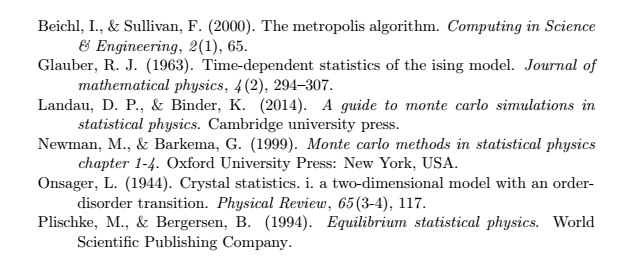